# MNIST-CNN
學習利用CNN的模型來做手寫辨識
順便比較利用MLP模型訓練出來的結果

### What is CNN?
[李宏毅CNN講義](http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/CNN.pdf)
李老師的講義有CNN的詳細介紹

簡單說，CNN與一般的DNN不同之處在於
* convolution layer
* pooling layer

![cnn](https://i.imgur.com/mhrmL69.png)

由於影像的特性:  
1. 有特徵形狀(如車子的輪子)  
2. 出現的位置不固定(取得影像的角度，視角，方向等等都會影響)   
3. 壓縮後不會影響整張圖片的判讀

所以我們可以利用convolution來萃取出影像的特徵
與利用pooling來獲取我們需要的資訊就好

其目的有兩點:
1. 因為影像的資訊量過於龐大，如一張500x500大小並以24位元儲存顏色的圖片來說，光是輸入層便有500x500x24個神經元，在往後接上全連結層的話其資料量會過於龐大，對於訓練上來說會非常消耗資源。
2. 以人類做影像辨識來說，我們看到一個物件的時候，是先對其特徵部位做出反應，如我們看到車子會先看到其有輪子，再來看到車門、窗戶等等，在我們腦中結合這些資訊以後才了解到這是車，所以我們如果使用全連結層做為訓練，是無法做出特徵判斷的，訓練的結果會較差。

## Step1. 匯入模組
標準起手式XD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils 

Using TensorFlow backend.


## Step2. 資料預處理，這裡處理資料與MLP的部分相差無幾
不同的是，在MLP部分我們是用全連結層去接資料，所以需要把資料從28x28轉成784
convolution layer的話，我們用二維圖形+第三維(色彩)去接

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()


x_train_r = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/256
x_test_r = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/256

y_train_r = np_utils.to_categorical(y_train)
y_test_r = np_utils.to_categorical(y_test)

print(x_train.shape, " ", x_train_r.shape)
print(type(x_train), " ",type(x_train))

(60000, 28, 28)   (60000, 28, 28, 1)
<class 'numpy.ndarray'>   <class 'numpy.ndarray'>


## Step3. 建立模型
在這裡我們用兩層的convolution與兩層的pooling
第二層以後便不需要input size

在卷積層完成以後需要先平坦化再接上全連結層做資料處理

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D 
model = Sequential()

model.add(Conv2D(filters=25,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(filters=25,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 25)        5650      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1225)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               122600    
_________________________________________________________________
dens

## Step4. 訓練模型
與MLP一樣

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history = model.fit(x_train_r,y_train_r,validation_split=0.2,batch_size=100,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.2503 - acc: 0.9250 - val_loss: 0.0818 - val_acc: 0.9764
Epoch 2/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0696 - acc: 0.9788 - val_loss: 0.0643 - val_acc: 0.9785
Epoch 3/10
48000/48000 [==============================] - 2s 46us/step - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0457 - val_acc: 0.9854
Epoch 4/10
48000/48000 [==============================] - 2s 46us/step - loss: 0.0362 - acc: 0.9886 - val_loss: 0.0471 - val_acc: 0.9849
Epoch 5/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0298 - acc: 0.9908 - val_loss: 0.0409 - val_acc: 0.9888
Epoch 6/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0384 - val_acc: 0.9883
Epoch 7/10
48000/48000 [==============================] - 2s 50us/step - loss: 

## Step5. 可視化訓練結果

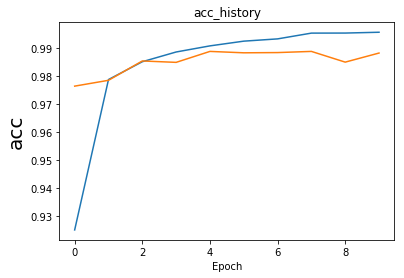

In [5]:
import matplotlib.pyplot as plt

def plot_train_result(train_history,train,val):
    plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title(train+'_history')
    plt.xlabel('Epoch')
    plt.ylabel(train,fontsize=20)
    plt.show()
    
plot_train_result(train_history,'acc','val_acc')

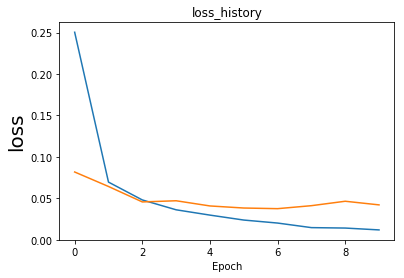

In [6]:
plot_train_result(train_history,'loss','val_loss')

## Step6. Inference step

In [7]:
score=model.evaluate(x_test_r,y_test_r)
predict = model.predict_classes(x_test_r)
print('Accuary of test data: %.1f'%(score[1]*100))

10000/10000 [==============================] - 0s 45us/step
Accuary of test data: 99.0


準確率高達98.9%

#### 與先前一樣把結果印出來吧

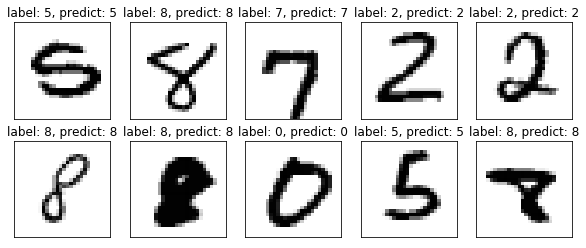

In [8]:
def printdata(data, label, predict):
    plt.figure(figsize=(10,4))
    idx=1;
    for i in np.random.randint(0,10000,10):
        ax = plt.subplot(2,5,idx)
        idx+=1
        ax.imshow(data[i],cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('label: '+str(label[i])+', predict: '+str(predict[i]))
    plt.show()

printdata(x_test,y_test,predict)

#### 把訓練好的模型儲存起來吧

In [20]:
model.save('mnist_cnn.h5')